### Final comparison fo the FEM formulations: which is the most performant among the tested strategies?

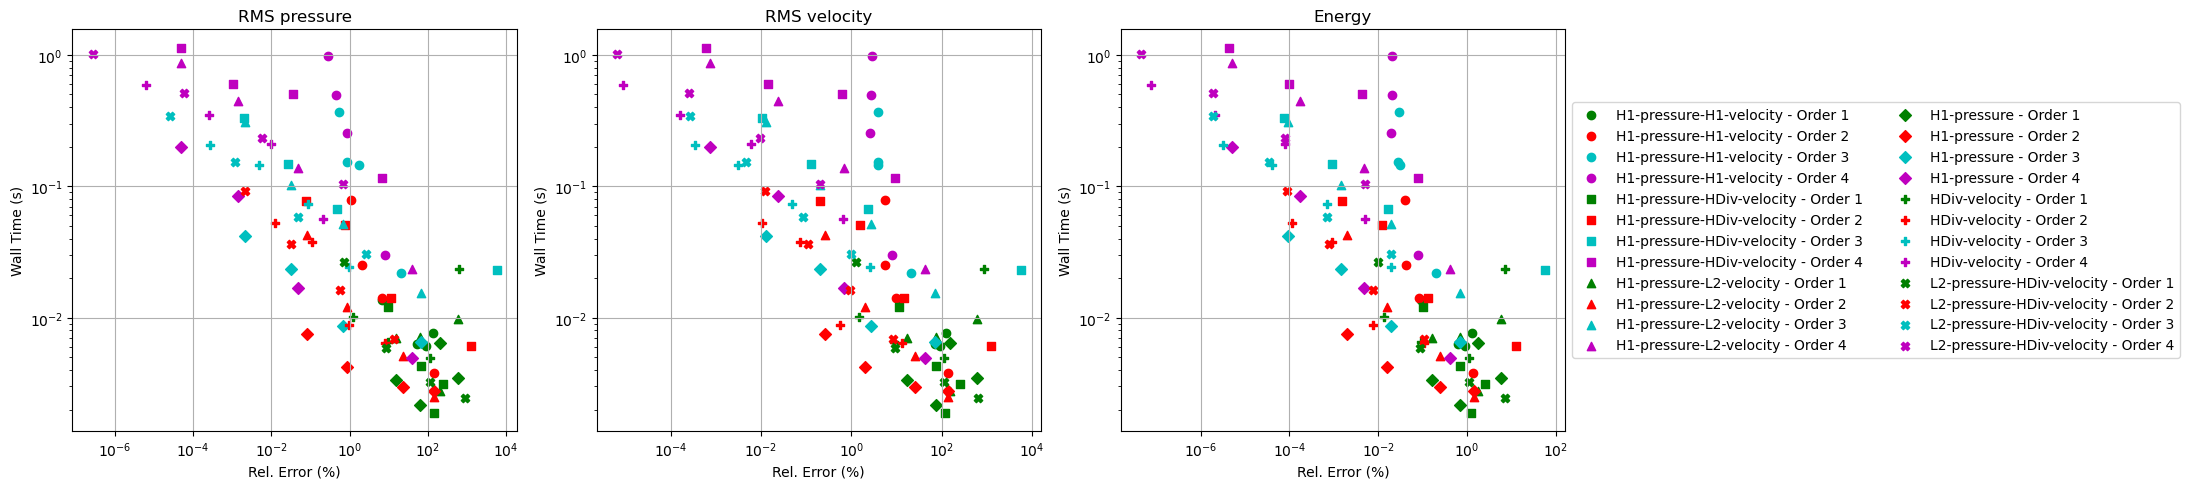

In [4]:
# Scatter plot of the errors stored in the csv file: error vs wall time
# Different markers are used for different orders
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 5))
markers = ['o', 's', '^', 'D', 'P', 'X', '*']  # Different markers for each order
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Different colors for each order

# Plot the RMS error (pressure) vs wall time
plt.subplot(1, 3, 1)
# Loop on all the csv files in the folder, changing the marker for each file
for i, file in enumerate(os.listdir('.')):
    if file.endswith('.csv'):
        df_errors = pd.read_csv(file)
        for order in df_errors['Order'].unique():
            subset = df_errors[df_errors['Order'] == order]
            plt.scatter(subset['RMS Error pressure']*100, subset['Wall Time (s)'], label=f"{os.path.splitext(file)[0]} - Order {order}", marker=markers[i % len(markers)], color=colors[order % len(colors)])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rel. Error (%)')
plt.ylabel('Wall Time (s)')
plt.title('RMS pressure')
plt.grid(True)

# Plot the RMS error (velocity) vs wall time
plt.subplot(1, 3, 2)
# Loop on all the csv files in the folder, changing the marker for each file
for i, file in enumerate(os.listdir('.')):
    if file.endswith('.csv'):
        df_errors = pd.read_csv(file)
        for order in df_errors['Order'].unique():
            subset = df_errors[df_errors['Order'] == order]
            plt.scatter(subset['RMS Error velocity']*100, subset['Wall Time (s)'], label=f"{os.path.splitext(file)[0]} - Order {order}", marker=markers[i % len(markers)], color=colors[order % len(colors)])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rel. Error (%)')
plt.ylabel('Wall Time (s)')
plt.title('RMS velocity')
plt.grid(True)

# Plot the energy error vs wall time
plt.subplot(1, 3, 3)
# Loop on all the csv files in the folder
for i, file in enumerate(os.listdir('.')):
    if file.endswith('.csv'):
        df_errors = pd.read_csv(file)
        # Loop on each order in the DataFrame
        for order in df_errors['Order'].unique():
            subset = df_errors[df_errors['Order'] == order]
            plt.scatter(subset['Energy Error'], subset['Wall Time (s)'], label=f"{os.path.splitext(file)[0]} - Order {order}", marker=markers[i % len(markers)], color=colors[order % len(colors)])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rel. Error (%)')
plt.ylabel('Wall Time (s)')
plt.title('Energy')
plt.grid(True)
# Locate legend outside the right side of the plot with two columns on the legend tags
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
plt.tight_layout()
plt.show()
